In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
from sklearn.metrics import *

from tabulate import tabulate


In [2]:
Xtrain = np.loadtxt('Xtrain.csv')
Ytrain = np.loadtxt('Ytrain.csv')
Xtest = np.loadtxt('Xtest.csv')

In [3]:
print('There are', Xtrain.shape[0], 'training examples')
print('There are', Xtest.shape[0], 'test examples')

There are 3000 training examples
There are 3000 test examples


Text(0.5, 1.0, 'Class +1 Example 10')

<Figure size 432x288 with 0 Axes>

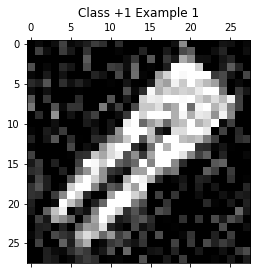

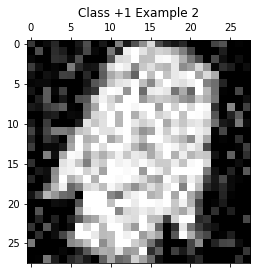

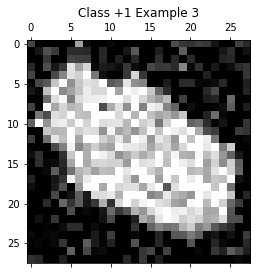

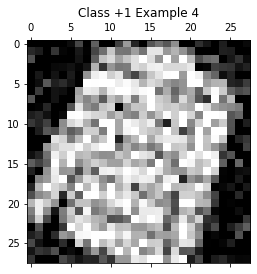

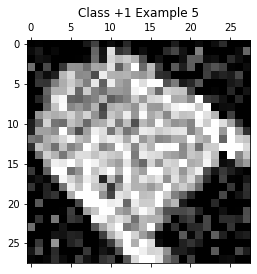

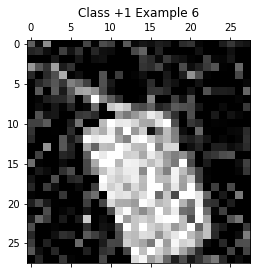

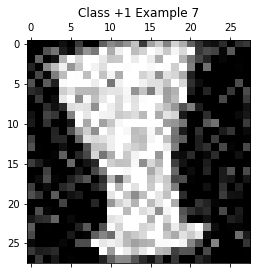

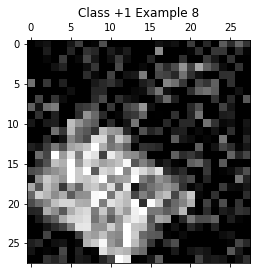

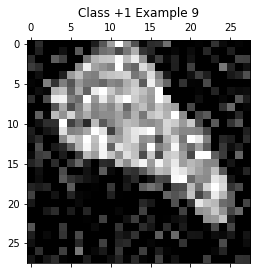

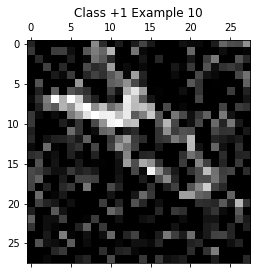

In [4]:
idx_class_neg1 = ( Ytrain == -1) # index for -1 class
idx_class_pos1 = ( Ytrain == +1) # index for +1 class

Xtrain_pos1 = Xtrain[idx_class_pos1, ] #all +1 class training examples
Xtrain_neg1 = Xtrain[idx_class_neg1, ] #all -1 class training examples
Ytrain_pos1 = Ytrain[idx_class_pos1, ] #all +1 class training labels
Ytrain_neg1 = Ytrain[idx_class_neg1, ] #all -1 class training labels

idx_pos1 = list(range(len(Ytrain_pos1)))
idx_neg1 = list(range(len(Ytrain_neg1)))
random.shuffle(idx_pos1) # Just shuffle the data for positive classes
random.shuffle(idx_neg1) # Just shuffle the data for positive classes
Xtrain_pos1_random, Ytrain_pos1_random = Xtrain_pos1[idx_pos1,:], Ytrain_pos1[idx_pos1] #randomly shuffled positive class
                                                                                        #training examples
Xtrain_neg1_random, Ytrain_neg1_random = Xtrain_neg1[idx_neg1,:], Ytrain_neg1[idx_neg1] #randomly shuffled negative class
                                                                                        #training examples
plt.gray();plt.matshow(Xtrain_pos1_random[0].reshape((28, 28)));plt.title('Class +1 Example 1')
plt.gray();plt.matshow(Xtrain_pos1_random[1].reshape((28, 28)));plt.title('Class +1 Example 2') 
plt.gray();plt.matshow(Xtrain_pos1_random[2].reshape((28, 28)));plt.title('Class +1 Example 3') 
plt.gray();plt.matshow(Xtrain_pos1_random[3].reshape((28, 28)));plt.title('Class +1 Example 4') 
plt.gray();plt.matshow(Xtrain_pos1_random[4].reshape((28, 28)));plt.title('Class +1 Example 5')  
plt.gray();plt.matshow(Xtrain_pos1_random[5].reshape((28, 28)));plt.title('Class +1 Example 6') 
plt.gray();plt.matshow(Xtrain_pos1_random[6].reshape((28, 28)));plt.title('Class +1 Example 7') 
plt.gray();plt.matshow(Xtrain_pos1_random[7].reshape((28, 28)));plt.title('Class +1 Example 8')  
plt.gray();plt.matshow(Xtrain_pos1_random[8].reshape((28, 28)));plt.title('Class +1 Example 9') 
plt.gray();plt.matshow(Xtrain_pos1_random[9].reshape((28, 28)));plt.title('Class +1 Example 10') 

Text(0.5, 1.0, 'Class -1 Example 10')

<Figure size 432x288 with 0 Axes>

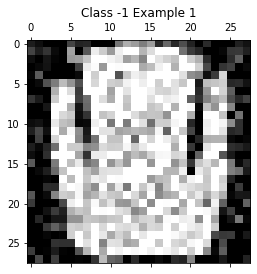

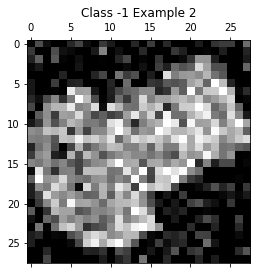

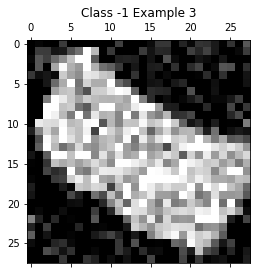

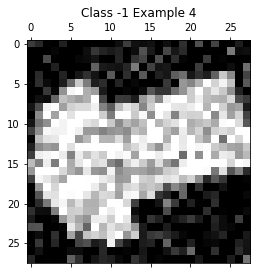

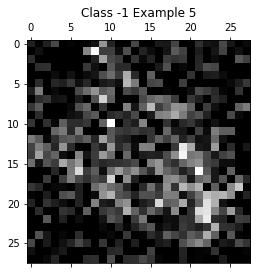

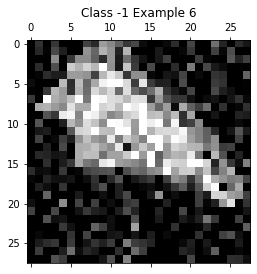

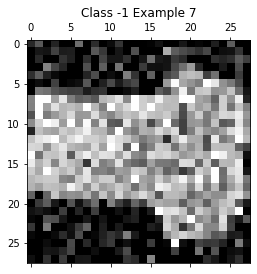

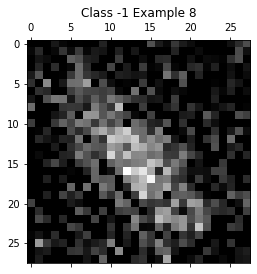

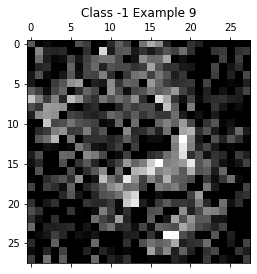

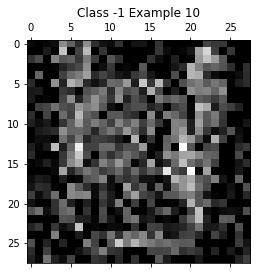

In [5]:
plt.gray();plt.matshow(Xtrain_neg1_random[0].reshape((28, 28)));plt.title('Class -1 Example 1')
plt.gray();plt.matshow(Xtrain_neg1_random[1].reshape((28, 28)));plt.title('Class -1 Example 2') 
plt.gray();plt.matshow(Xtrain_neg1_random[2].reshape((28, 28)));plt.title('Class -1 Example 3') 
plt.gray();plt.matshow(Xtrain_neg1_random[3].reshape((28, 28)));plt.title('Class -1 Example 4') 
plt.gray();plt.matshow(Xtrain_neg1_random[4].reshape((28, 28)));plt.title('Class -1 Example 5')  
plt.gray();plt.matshow(Xtrain_neg1_random[5].reshape((28, 28)));plt.title('Class -1 Example 6') 
plt.gray();plt.matshow(Xtrain_neg1_random[6].reshape((28, 28)));plt.title('Class -1 Example 7') 
plt.gray();plt.matshow(Xtrain_neg1_random[7].reshape((28, 28)));plt.title('Class -1 Example 8')  
plt.gray();plt.matshow(Xtrain_neg1_random[8].reshape((28, 28)));plt.title('Class -1 Example 9') 
plt.gray();plt.matshow(Xtrain_neg1_random[9].reshape((28, 28)));plt.title('Class -1 Example 10')

In [6]:
print('There are', len(Ytrain_pos1), 'positive training examples.')
print('There are', len(Ytrain_neg1), 'negative training examples.')

There are 2118 positive training examples.
There are 882 negative training examples.


Accuracy should not be used due to class imbalance. There is moderate class imbalance within our dataset so we choose to use Precision Recall, which enables us to validate our models across a range of thresholds. This will enable us to choose an optimal threshold when defining our final model. 

The expected accuracy of a random classifier that is predicting each class with a probability of a 50% is 50%. Suppose we are predicting 100 values. From the training data we have that 29.4% of observations belong in the negative class and 70.6% belong in the positive. From these 100 values, the expected values of prediction will be 50 in the positive class and 50 in the negative. For the negative class ~30% will be correct and for the positive class ~70% will be correct. So the expected accuracy is:

$\frac{(0.3*50) + (0.7*50)}{ 100} = \frac{15 + 35}{100} = 0.5$ 

Demonstrating this with out data using a 5-fold cross validation:

In [7]:
#random classifier that is predicting each class with a probability of 50%
from sklearn.model_selection import cross_val_score #imported to evaluate model performance on CV set
from sklearn.model_selection import StratifiedKFold #imported to get stratified CV
from sklearn.dummy import DummyClassifier
#first relabel -1 to be the positive class as it is the minority class and should be the target
dcf = DummyClassifier(strategy = 'uniform')
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_rand = cross_val_score(dcf, Xtrain, Ytrain, cv=skf)

print('Average accuracy across a 5-fold Cross Validation is %0.3f' % (acc_rand.mean()))


Average accuracy across a 5-fold Cross Validation is 0.510


Similarly demonstrating this for the ROC AUC and PR AUC: 

In [8]:
roc_rand = cross_val_score(dcf, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc')
pr_rand = cross_val_score(dcf, Xtrain, Ytrain, cv=skf, scoring = 'average_precision')
print('Average ROC across a 5-fold Cross Validation for a random classifier is %0.3f'  % (roc_rand.mean()))
print('Average Precision-Recall across a 5-fold Cross Validation for a random classifier is %0.3f' % (pr_rand.mean()))



Average ROC across a 5-fold Cross Validation for a random classifier is 0.500
Average Precision-Recall across a 5-fold Cross Validation for a random classifier is 0.706


For the ROC, this is because the 'random' classifier with no skill fits a straight line through the center, so the AUC of that curve is 0.5. 

For the Precision-Recall, a 'random' classifier on a balanced dataset would obtain a PR AUC of 0.5. This is because it is classifying randomly and thus its Precision would be 0.5 as half of the number of +1 classes it predicts would be true regardless or the recall. Thus for an our imbalanced dataset, as 70.6% of our observations are from the +1 class we get that the Precision is 0.706, so the PR curve is a horizontal line through this point. Thus the PR AUC = 0.706. 

# Question 2

In [9]:
##################################
### K Nearest Neighbours K = 1 ###
##################################

from sklearn.neighbors import KNeighborsClassifier

sknn = KNeighborsClassifier(n_neighbors=1)
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For untransformed data with KNN, K=1:')
for f in range(0,5):
    print("Fold %0.0f: Accuracy is %0.3f, ROC is %0.3f, PR is %0.3f" % (f+1, acc[f], roc[f], pr[f]))
    
print('')

print("%0.3f average accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f average ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f average precision-recall with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For untransformed data with KNN, K=1:
Fold 1: Accuracy is 0.758, ROC is 0.734, PR is 0.824
Fold 2: Accuracy is 0.757, ROC is 0.731, PR is 0.822
Fold 3: Accuracy is 0.758, ROC is 0.723, PR is 0.817
Fold 4: Accuracy is 0.753, ROC is 0.725, PR is 0.817
Fold 5: Accuracy is 0.738, ROC is 0.708, PR is 0.807

0.753 average accuracy with a standard deviation of 0.008
0.724 average ROC with a standard deviation of 0.009
0.818 average precision-recall with a standard deviation of 0.006


Trying the same but with different forms of preprocessing. Firstly we shall try using the standard scalar.

In [10]:
#######################################################
### K Nearest Neighbours K = 1 with Standard Scalar ###
#######################################################

from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

sknn_ss = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=1))
acc_ss = cross_val_score(sknn_ss, Xtrain, Ytrain, cv=skf)
roc_ss = cross_val_score(sknn_ss, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_ss = cross_val_score(sknn_ss, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For standardised data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc_ss.mean(), acc_ss.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc_ss.mean(), roc_ss.std()))
print("%0.3f Precision-Recall with a standard deviation of %0.3f" % (pr_ss.mean(), pr_ss.std()))

For standardised data with KNN, K=1:
0.750 accuracy with a standard deviation of 0.016
0.718 ROC with a standard deviation of 0.019
0.814 Precision-Recall with a standard deviation of 0.011


Using KNN, K = 1 with Min-Max Scalar

In [11]:
#######################################################
### K Nearest Neighbours K = 1 with Min-Max Scalar ###
#######################################################

sknn_mm = make_pipeline(preprocessing.MinMaxScaler(), KNeighborsClassifier(n_neighbors=1))
acc_mm = cross_val_score(sknn_mm, Xtrain, Ytrain, cv=skf)
roc_mm = cross_val_score(sknn_mm, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_mm = cross_val_score(sknn_mm, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For Min-Max Scaled data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc_mm.mean(), acc_mm.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc_mm.mean(), roc_mm.std()))
print("%0.3f PR with a standard deviation of %0.3f" % (pr_mm.mean(), pr_mm.std()))

For Min-Max Scaled data with KNN, K=1:
0.753 accuracy with a standard deviation of 0.009
0.724 ROC with a standard deviation of 0.010
0.817 PR with a standard deviation of 0.006


Finally, trying KNN with K=1 using Max-Abs Scalar

In [12]:
######################################################
### K Nearest Neighbours K = 1 with Max-Abs Scalar ###
######################################################

sknn_abs = make_pipeline(preprocessing.MaxAbsScaler(), KNeighborsClassifier(n_neighbors=1))
acc_abs = cross_val_score(sknn_abs, Xtrain, Ytrain, cv=skf)
roc_abs = cross_val_score(sknn_abs, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_abs = cross_val_score(sknn_abs, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For Max Abs Scaled data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc_abs.mean(), acc_abs.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc_abs.mean(), roc_abs.std()))
print("%0.3f Precision-Recall with a standard deviation of %0.3f" % (pr_abs.mean(), pr_abs.std()))

For Max Abs Scaled data with KNN, K=1:
0.753 accuracy with a standard deviation of 0.009
0.724 ROC with a standard deviation of 0.010
0.817 Precision-Recall with a standard deviation of 0.006


In [13]:
table_knn = [
    ['Preprocessing', 'Mean Accuracy', 'Accuracy Std', 'Mean ROC', 'ROC Std', 'Mean PR', 'PR Std'],
    ['None', round(acc.mean(),3), round(acc.std(),3), round(roc.mean(),3), round(roc.std(),3), round(pr.mean(),3),round(pr.std(),3)],
    ['Standardisation', round(acc_ss.mean(), 3), round(acc_ss.std(),3), round(roc_ss.mean(),3), round(roc_ss.std(),3), round(pr_ss.mean(),3),round(pr_ss.std(),3)],
    ['Min-Max', round(acc_mm.mean(),3), round(acc_mm.std(),3), round(roc_mm.mean(),3), round(roc_mm.std(),3), round(pr_mm.mean(),3),round(pr_mm.std(),3)],
    ['Max-Abs', round(acc_abs.mean(),3), round(acc_abs.std(),3), round(roc_abs.mean(),3), round(roc_abs.std(),3), round(pr_abs.mean(),3),round(pr_abs.std(),3)],
]

print(tabulate(table_knn, headers='firstrow'))

Preprocessing      Mean Accuracy    Accuracy Std    Mean ROC    ROC Std    Mean PR    PR Std
---------------  ---------------  --------------  ----------  ---------  ---------  --------
None                       0.753           0.008       0.724      0.009      0.818     0.006
Standardisation            0.75            0.016       0.718      0.019      0.814     0.011
Min-Max                    0.753           0.009       0.724      0.01       0.817     0.006
Max-Abs                    0.753           0.009       0.724      0.01       0.817     0.006


These pre-processing methods make no difference. Finding optimal K using unprocessed data:

In [14]:
from sklearn.model_selection import cross_val_score   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# best_acc = [0,0,0]
# best_roc = [0,0,0]
# best_pr = [0,0,0]
# #sorted(sklearn.metrics.SCORERS.keys()) ones I can use in cross_val_score
# for k in range(1, 201):
#     sknn = KNeighborsClassifier(n_neighbors=k)
#     skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
#     acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
#     roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
#     pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change
    
#     if best_acc[0] < acc.mean():
#         best_acc[0] = acc.mean()
#         best_acc[1] = acc.std()
#         best_acc[2] = k
        
#     if best_roc[0] < roc.mean():
#         best_roc[0] = roc.mean()
#         best_roc[1] = roc.std()
#         best_roc[2] = k
        
#     if best_pr[0] < pr.mean():
#         best_pr[0] = pr.mean()
#         best_pr[1] = pr.std()
#         best_pr[2] = k

# #     print('For untransformed data with KNN, K=',k)
# #     print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
# #     print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
# #     print("%0.3f Precision-Recall with a standard deviation of %0.3f" % (pr.mean(), pr.std()))
# #     print('')
    
# print('Best Accuracy is %0.3f for K = %0.0f' % (best_acc[0], best_acc[2]) )
# print('Best ROC is %0.3f for K = %0.0f' % (best_roc[0], best_roc[2]) )
# print('Best Precision-Recall is %0.3f for K = %0.0f' % (best_pr[0], best_pr[2]) )

In [15]:
#best average_precision score is obtained for K = 17 so we will use that

sknn = KNeighborsClassifier(n_neighbors=15)
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_KNN = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc_KNN= cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_KNN = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

    
print('Accuracy is %0.3f for K = 15' % (acc_KNN.mean()) )
print('ROC is %0.3f for K = 15' % (roc_KNN.mean()) )
print('Precision-Recall is %0.3f for K = 15' % (pr_KNN.mean()) )

Accuracy is 0.755 for K = 15
ROC is 0.777 for K = 15
Precision-Recall is 0.880 for K = 15


# Question 3

### K-Nearest Neighbours

In [16]:
print('For KNN with K = 15:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc_KNN.mean(), acc_KNN.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc_KNN.mean(), roc_KNN.std()))
print("%0.3f Precision-Recall with a standard deviation of %0.3f" % (pr_KNN.mean(), pr_KNN.std()))

For KNN with K = 15:
0.755 accuracy with a standard deviation of 0.004
0.777 ROC with a standard deviation of 0.021
0.880 Precision-Recall with a standard deviation of 0.014


### Perceptron

I do not optimise the perceptron as adding the use of regularisation terms to it makes it a SVM.

In [17]:
from sklearn.linear_model import Perceptron

clf_perceptron = Perceptron()
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_perceptron = cross_val_score(clf_perceptron, Xtrain, Ytrain, cv=skf)
roc_perceptron = cross_val_score(clf_perceptron, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_perceptron = cross_val_score(clf_perceptron, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') 

print('For Perceptron:')
print("%0.3f Accuracy with a standard deviation of %0.3f" % (acc_perceptron.mean(), acc_perceptron.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc_perceptron.mean(), roc_perceptron.std()))
print("%0.3f Precision-Recall with a standard deviation of %0.3f" % (pr_perceptron.mean(), pr_perceptron.std()))

For Perceptron:
0.616 Accuracy with a standard deviation of 0.072
0.566 ROC with a standard deviation of 0.011
0.755 Precision-Recall with a standard deviation of 0.012


### Naïve Bayes Classifier

We assume that the data is normally distributed and choose a Gauissian Naïve Bayes model

In [18]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_nb = cross_val_score(clf_nb, Xtrain, Ytrain, cv=skf)
roc_nb = cross_val_score(clf_nb, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_nb = cross_val_score(clf_nb, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') 

print('For Naive Bayes Classifier:')
print("%0.3f Accuracy with a standard deviation of %0.3f" % (acc_nb.mean(), acc_nb.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc_nb.mean(), roc_nb.std()))
print("%0.3f Precision-Recall with a standard deviation of %0.3f" % (pr_nb.mean(), pr_nb.std()))

For Naive Bayes Classifier:
0.558 Accuracy with a standard deviation of 0.020
0.572 ROC with a standard deviation of 0.013
0.771 Precision-Recall with a standard deviation of 0.011


### Logistic Regression

For this model fitting process we will use standardised data as it is required for Ridge-Regression, LASSO and Elastic-Net

In [19]:
########################################### 
### GRID SEARCH FOR LOGISTIC REGRESSION ###
########################################### 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# scaler = preprocessing.StandardScaler()
# clf_lr = LogisticRegression(max_iter = 10000)
# skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
# pipe =  Pipeline(steps=[("scaler", scaler), ('clf_lr', clf_lr)])


# param_grid = [
#     { 'clf_lr__class_weight' : ['balanced', None], 
#      'clf_lr__solver': ['saga'], #saga can be used for all the penalty functions
#     'clf_lr__penalty' :  ['none']},
#     {'clf_lr__C': [1, 5, 10, 50], 'clf_lr__class_weight' : ['balanced', None], 
#      'clf_lr__solver': ['saga'], #saga can be used for all the penalty functions
#     'clf_lr__penalty' :  [ 'l1', 'l2']}, #elastic net, ridge regression, LASSSO and standard logistic regression
#     { 'clf_lr__C': [1, 5, 10, 50], 'clf_lr__class_weight' : ['balanced', None], 
#      'clf_lr__solver': ['saga'], #saga can be used for all the penalty functions
#     'clf_lr__penalty' :  ['elasticnet'], 'clf_lr__l1_ratio' : [0.2, 0.5, 0.7]}   
# ]

# search_clf_lr = GridSearchCV(pipe, param_grid, scoring='average_precision', cv=skf, refit=True)
# search_clf_lr.fit(Xtrain, Ytrain)

# search_clf_lr.best_params_

Optimal model uses L1 penalty i.e. it is a LASSO. 

In [20]:
clf_lr = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(C = 1, class_weight = None, penalty = 'l1', max_iter = 10000, solver ='saga'))
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_lr = cross_val_score(clf_lr, Xtrain, Ytrain, cv=skf)
roc_lr = cross_val_score(clf_lr, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_lr = cross_val_score(clf_lr, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') 

print('For Logistic Regression:')
print("%0.3f Accuracy with a standard deviation of %0.3f" % (acc_lr.mean(), acc_lr.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc_lr.mean(), roc_lr.std()))
print("%0.3f Precision-Recall with a standard deviation of %0.3f" % (pr_lr.mean(), pr_lr.std()))

For Logistic Regression:
0.628 Accuracy with a standard deviation of 0.018
0.566 ROC with a standard deviation of 0.007
0.754 Precision-Recall with a standard deviation of 0.012


### Linear SVM

Also using standardised data on this as the distance between observations is crucial for assessing distance in this model, so having them all on the same scale will prevent any particular point having increased influence.

In [52]:
################################## 
### GRID SEARCH FOR LINEAR SVC ###
################################## 

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# scaler = preprocessing.StandardScaler()
# lin_svc = LinearSVC(max_iter = 10000)
# skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
# pipe =  Pipeline(steps=[("scaler", scaler), ('lin_svc', lin_svc)])


# param_grid = [
#     {'lin_svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'lin_svc__class_weight' : ['balanced', None]}
# ]

# search_lin_svc = GridSearchCV(pipe, param_grid, scoring='average_precision', cv=skf, refit=True, n_jobs=4)
# search_lin_svc.fit(Xtrain, Ytrain)

# search_lin_svc.best_params_



{'lin_svc__C': 0.001, 'lin_svc__class_weight': 'balanced'}

Grid search finds that the best model uses C = 1 and has no class weight. This also had a convergence issue which was not resolved by increasing the max number of iterations. 

In [53]:
lin_svc_final = make_pipeline(preprocessing.StandardScaler(), LinearSVC(C = 0.001, class_weight = 'balanced', max_iter = 10000))
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_lin_svc = cross_val_score(lin_svc_final, Xtrain, Ytrain, cv=skf)
roc_lin_svc = cross_val_score(lin_svc_final, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_lin_svc = cross_val_score(lin_svc_final, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') 

### Kernelized SVM

Will fit the SVM with different Kernal's and pick the best performer based on the average_precision score.

In [23]:
######################################
### GRID SEARCH FOR KERNALISED SVC ###
###################################### 

from sklearn.svm import SVC

# scaler = preprocessing.StandardScaler()
# svc = SVC(cache_size = 12000)
# skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
# pipe =  Pipeline(steps=[("scaler", scaler), ('svc', svc)])
# skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

# param_grid = [
#     {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale', 'auto'], 'svc__kernel': ['rbf', 'sigmoid'], 
#      'svc__class_weight' : ['balanced', None]}, 
#     {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale', 'auto'], 'svc__kernel': ['poly'], 
#      'svc__class_weight' : ['balanced', None], 'svc__degree' : [2, 3, 4, 5, 6]}
# ]

# search_svc = GridSearchCV(pipe, param_grid, scoring='average_precision', cv=skf, refit=True)
# search_svc.fit(Xtrain, Ytrain)
# search_svc.best_params_


Grid search finds that the polynomial kernal with a power of 4 performs best.

In [24]:
svc_final = make_pipeline(preprocessing.StandardScaler(), SVC(C = 10, class_weight = None, gamma = 0.001, degree = 4, kernel = 'poly'))
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_svc = cross_val_score(svc_final, Xtrain, Ytrain, cv=skf)
roc_svc = cross_val_score(svc_final, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_svc = cross_val_score(svc_final, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') 

In [25]:
table = [
    ['Model', 'Mean Accuracy', 'Accuracy Std', 'Mean ROC', 'ROC Std', 'Mean PR', 'PR Std'],
    ['KNN', round(acc_KNN.mean(),3), round(acc_KNN.std(),3), round(roc_KNN.mean(),3), round(roc_KNN.std(),3), round(pr_KNN.mean(),3), round(pr_KNN.std(),3)],
    ['Perceptron', round(acc_perceptron.mean(), 3), round(acc_perceptron.std(), 3), round(roc_perceptron.mean(), 3), round(roc_perceptron.std(), 3), round(pr_perceptron.mean(),3), round(pr_perceptron.std(), 3)],
    ['Naive Bayes', round(acc_nb.mean(),3), round(acc_nb.std(),3), round(roc_nb.mean(),3), round(roc_nb.std(),3), round(pr_nb.mean(),3), round(pr_nb.std(),3)],
    ['Logistic Regression', round(acc_lr.mean(),3), round(acc_lr.std(),3), round(roc_lr.mean(),3), round(roc_lr.std(),3), round(pr_lr.mean(),3), round(pr_lr.std(),3)],
    ['Linear SVM', round(acc_lin_svc.mean(), 3), round(acc_lin_svc.std(), 3), round(roc_lin_svc.mean(), 3), round(roc_lin_svc.std(), 3), round(pr_lin_svc.mean(), 3), round(pr_lin_svc.std(),3)],
    ['Kernalised SVM', round(acc_svc.mean(), 3), round(acc_svc.std(), 3), round(roc_svc.mean(), 3), round(roc_svc.std(), 3), round(pr_svc.mean(), 3), round(pr_svc.std(), 3)]
    ]

In [26]:
print(tabulate(table, headers='firstrow'))

Model                  Mean Accuracy    Accuracy Std    Mean ROC    ROC Std    Mean PR    PR Std
-------------------  ---------------  --------------  ----------  ---------  ---------  --------
KNN                            0.755           0.004       0.777      0.021      0.88      0.014
Perceptron                     0.616           0.072       0.566      0.011      0.755     0.012
Naive Bayes                    0.558           0.02        0.572      0.013      0.771     0.011
Logistic Regression            0.628           0.018       0.566      0.007      0.754     0.012
Linear SVM                     0.615           0.013       0.561      0.008      0.755     0.012
Kernalised SVM                 0.744           0.009       0.787      0.021      0.899     0.012


Clearly the Kernalised SVM performs best across the 3 performance metrics. Will now try dimensionality reduction through PCA. 

# Question 4

The data dimensions are (3000, 2) (3000,)


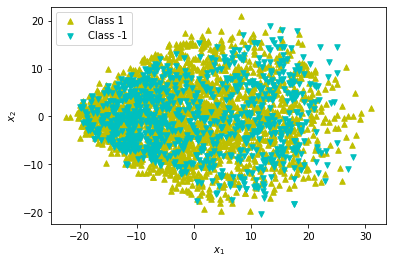

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#first standardise the data 

Xtrain_std_scale = preprocessing.StandardScaler().fit_transform(Xtrain)
Xtrain_PCA = pca.fit_transform(Xtrain_std_scale)

plt.scatter(Xtrain_PCA[Ytrain==1,0],Xtrain_PCA[Ytrain==1,1],marker = '^', c = 'y', s = 30, label = 'Class 1')
plt.scatter(Xtrain_PCA[Ytrain==-1,0],Xtrain_PCA[Ytrain==-1,1],marker = 'v',c = 'c', s = 30, label = 'Class -1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')        
plt.legend(loc = 'upper left')
print('The data dimensions are',Xtrain_PCA.shape, Ytrain.shape)

Clearly no linear seperability when the number of dimensions is reduced to 2

In [28]:
sum(pca.explained_variance_ratio_) # ~22% of variance explained by first 2 principal components

0.21713692593329326

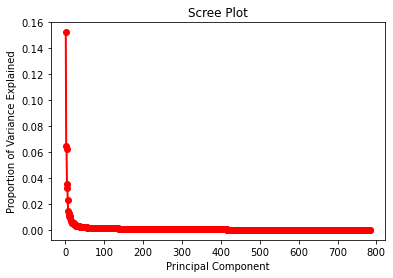

In [29]:
#scree plot of 20 Principal components
pca = PCA(n_components=Xtrain.shape[1])

#first standardise the data 

Xtrain_std_scale = preprocessing.StandardScaler().fit_transform(Xtrain)
Xtrain_PCA = pca.fit_transform(Xtrain_std_scale)


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

At around 20 principal components the proportion of variance explained plateaus. We will iterate through them until we find the optimal amount that explain 95% of variance 

In [30]:
###############################
### PCA Component Iteration ###
###############################

# out_sum = 0
# c = 0

# while out_sum < 0.95:
#     c += 1
#     pca = PCA(n_components=c)
#     Xtrain_PCA = pca.fit_transform(Xtrain_std_scale)
#     out_sum = np.sum(pca.explained_variance_ratio_)  


# print('%0.0f components results in %0.2f of explained variance' % (c, out_sum))
    

When the number of components is 534 we achieve a total explained variance of 95%.

In [31]:
c_final = 534
pca = PCA(n_components=c_final)
Xtrain_PCA = pca.fit_transform(Xtrain_std_scale)
out_sum_final = np.sum(pca.explained_variance_ratio_)  

print('%0.0f components results in %0.2f of explained variance' % (c_final, out_sum_final))

534 components results in 0.95 of explained variance


Refitting the kernelised SVM with the dimensionality reduced dataset

In [58]:
###############################################
### GRID SEARCH FOR KERNALISED SVC WITH PCA ###
############################################### 

scaler = preprocessing.StandardScaler()
pca = PCA(n_components = c_final)
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
svc = SVC(cache_size = 4000)

pipe =  Pipeline(steps=[("scaler", scaler), ('pca', pca), ('svc', svc)])

param_grid = [
    {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale', 'auto'], 'svc__kernel': ['rbf', 'sigmoid'], 'svc__class_weight' : ['balanced', None]},
    {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale', 'auto'], 'svc__kernel': ['poly'], 
     'svc__class_weight' : ['balanced', None], 'svc__degree' : [2, 3, 4, 5, 6]}
]


search_svc_pca = GridSearchCV(pipe, param_grid, scoring='average_precision', cv=skf, refit=True, n_jobs=4)
search_svc_pca.fit(Xtrain, Ytrain)
search_svc_pca.best_params_


KeyboardInterrupt: 

The polynomial kernal is also chosen as the optimal in this SVM. It selects diffetent parameters, a lower degree and chooses a balanced class weight.

In [33]:
svc_pca_final = make_pipeline(preprocessing.StandardScaler(), PCA(n_components = 534), SVC(C = 10, class_weight = 'balanced', degree = 3, gamma = 0.01, kernel = 'poly'))
acc_svc_pca = cross_val_score(svc_pca_final, Xtrain, Ytrain, cv=skf)
roc_svc_pca = cross_val_score(svc_pca_final, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_svc_pca = cross_val_score(svc_pca_final, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

In [55]:
table2 = [
    ['Model', 'Mean Accuracy', 'Accuracy Std', 'Mean ROC', 'ROC Std', 'Mean PR', 'PR Std'],
    ['KNN', round(acc_KNN.mean(),3), round(acc_KNN.std(),3), round(roc_KNN.mean(),3), round(roc_KNN.std(),3), round(pr_KNN.mean(),3), round(pr_KNN.std(),3)],
    ['Perceptron', round(acc_perceptron.mean(), 3), round(acc_perceptron.std(), 3), round(roc_perceptron.mean(), 3), round(roc_perceptron.std(), 3), round(pr_perceptron.mean(),3), round(pr_perceptron.std(), 3)],
    ['Naive Bayes', round(acc_nb.mean(),3), round(acc_nb.std(),3), round(roc_nb.mean(),3), round(roc_nb.std(),3), round(pr_nb.mean(),3), round(pr_nb.std(),3)],
    ['Logistic Regression', round(acc_lr.mean(),3), round(acc_lr.std(),3), round(roc_lr.mean(),3), round(roc_lr.std(),3), round(pr_lr.mean(),3), round(pr_lr.std(),3)],
    ['Linear SVM', round(acc_lin_svc.mean(), 3), round(acc_lin_svc.std(), 3), round(roc_lin_svc.mean(), 3), round(roc_lin_svc.std(), 3), round(pr_lin_svc.mean(), 3), round(pr_lin_svc.std(),3)],
    ['Kernalised SVM', round(acc_svc.mean(), 3), round(acc_svc.std(), 3), round(roc_svc.mean(), 3), round(roc_svc.std(), 3), round(pr_svc.mean(), 3), round(pr_svc.std(), 3)],
    ['PCA Kernalised SVM', round(acc_svc_pca.mean(), 3), round(acc_svc_pca.std(), 3), round(roc_svc_pca.mean(), 3), round(roc_svc_pca.std(), 3), round(pr_svc_pca.mean(), 3), round(pr_svc_pca.std(), 3)]
]

Comparing all the models we have fitted

In [56]:
print(tabulate(table2, headers='firstrow'))

Model                  Mean Accuracy    Accuracy Std    Mean ROC    ROC Std    Mean PR    PR Std
-------------------  ---------------  --------------  ----------  ---------  ---------  --------
KNN                            0.755           0.004       0.777      0.021      0.88      0.014
Perceptron                     0.616           0.072       0.566      0.011      0.755     0.012
Naive Bayes                    0.558           0.02        0.572      0.013      0.771     0.011
Logistic Regression            0.628           0.018       0.566      0.007      0.754     0.012
Linear SVM                     0.58            0.007       0.58       0.005      0.762     0.011
Kernalised SVM                 0.744           0.009       0.787      0.021      0.899     0.012
PCA Kernalised SVM             0.78            0.003       0.799      0.012      0.891     0.012


The performance of the Kernelised SVMs with and without PCA is almost identical.

# Question 5

First looking at the Kernelised SVM without dimensionality reduction.

In [38]:
Final_Model_SVC = make_pipeline(preprocessing.StandardScaler(), SVC(C = 10, class_weight = None, gamma = 0.001, degree = 4, kernel = 'poly', probability = True))
precision_list = []
recall_list = []
threshold_list = []
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
for train_index, test_index in skf.split(Xtrain, Ytrain):
    X_train, X_cv = Xtrain[train_index], Xtrain[test_index]
    y_train, y_cv = Ytrain[train_index], Ytrain[test_index]
    Final_Model_SVC.fit(X_train, y_train)
    y_cv_scores = Final_Model_SVC.predict_proba(X_cv)[:,1]
    pr, re, thres = precision_recall_curve(y_cv, y_cv_scores, pos_label = 1)
    precision_list.append(pr)
    recall_list.append(re)
    threshold_list.append(thres)

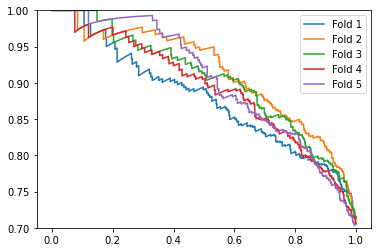

In [51]:
plt.plot(recall_list[0], precision_list[0], label = 'Fold 1')
plt.plot(recall_list[1], precision_list[1], label = 'Fold 2')
plt.plot(recall_list[2], precision_list[2], label = 'Fold 3')
plt.plot(recall_list[3], precision_list[3], label = 'Fold 4')
plt.plot(recall_list[4], precision_list[4], label = 'Fold 5')
plt.ylim(0.7,1)
plt.legend()

Comparing it to the SVC with PCA

In [40]:
Final_Model_PCA_SVC = make_pipeline(preprocessing.StandardScaler(), PCA(n_components = 534), SVC(C = 10, class_weight = 'balanced', degree = 3, gamma = 0.01, kernel = 'poly', probability = True)) 
precision_list_2 = []
recall_list_2 = []
threshold_list_2 = []
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
for train_index, test_index in skf.split(Xtrain, Ytrain):
    X_train, X_cv = Xtrain[train_index], Xtrain[test_index]
    y_train, y_cv = Ytrain[train_index], Ytrain[test_index]
    Final_Model_PCA_SVC.fit(X_train, y_train)
    y_cv_scores = Final_Model_PCA_SVC.predict_proba(X_cv)[:,1]
    pr, re, thres = precision_recall_curve(y_cv, y_cv_scores, pos_label = 1)
    precision_list_2.append(pr)
    recall_list_2.append(re)
    threshold_list_2.append(thres)

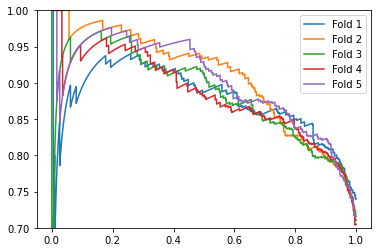

In [50]:
plt.plot(recall_list_2[0], precision_list_2[0], label = 'Fold 1')
plt.plot(recall_list_2[1], precision_list_2[1], label = 'Fold 2')
plt.plot(recall_list_2[2], precision_list_2[2], label = 'Fold 3')
plt.plot(recall_list_2[3], precision_list_2[3], label = 'Fold 4')
plt.plot(recall_list_2[4], precision_list_2[4], label = 'Fold 5')
plt.ylim(0.7, 1)
plt.legend()

Trying to use a smaller number of principal components

In [57]:
##############################################################################
### GRID SEARCH FOR KERNALISED SVC WITH PCA WITH LOWER EXPLAINED VARIANCE ###
##############################################################################

scaler = preprocessing.StandardScaler()
pca = PCA(n_components = 0.8)
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
svc = SVC(cache_size = 4000)

pipe =  Pipeline(steps=[("scaler", scaler), ('pca', pca), ('svc', svc)])

param_grid = [
    {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale', 'auto'], 
     'svc__kernel': ['rbf', 'sigmoid'], 'svc__class_weight' : ['balanced', None]},
    {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale', 'auto'], 
     'svc__kernel': ['poly'], 'svc__class_weight' : ['balanced', None], 'svc__degree' : [2, 3, 4, 5, 6]}
]


search_svc_pca = GridSearchCV(pipe, param_grid, scoring='average_precision', cv=skf, refit=True, n_jobs=4)
search_svc_pca.fit(Xtrain, Ytrain)
search_svc_pca.best_params_


KeyboardInterrupt: 

In [ ]:
Ytest_scores = Final_Model.predict_proba(Xtest)[:,1]